# A Music Taste Analysis Using Spotify API and Python.

### Exploring Audio Features and building a Machine Learning Approach

A Few days back I was reading a really interesting article written by a friend of mine (Luz) who analysed his spotify playlist using it's API (Application Programming Interface). After reading it I opened the app, looked at my playlist and realised that I listen to really distinct styles of music throughout the week or even throughout the day. I could be listening to Samba one minute and after a while swipe to heavy metal. Thinking of that I decided to **analyse not only mine but also my Fiancée's taste in music** to figure out what the data has to say about this.


So,in order to do that I started by scraping the audio features of 10 artists that we listen to the most on spotify using it's API so that I was able to perform the music taste analysis. In addition to that, I trained a machine learning model to predict each list a song would be more likely to belong to.

Another noteworthy fact is that I had as a reference some materials from the Data Science do zero which is one well-known data science community in Brazil. 








You can check all the code I develop on my github page


## Tools 
* Spotipy Library to get access to Spotify platform music data 
* Seaborn and matplotlib for data visualization
* Pandas and numpy for data analysis
* sklearn to build the Machine Learning model


# Spotify Audio Features

As we know Spotify is one of the most popular audio streaming platforms around the globe. Likewise Twitter,Slack and Facebook they have an API for developers to explore their music database and get insights into our listening habits.

Based on that, I chose ten artists that I often listen to in my daily routine and asked my Fiancée to give me one list with the ones she likes the most. After having the artists lists, I used the *Rare Loot* post as a reference to obtain the audio features data for my analysis.

The first data set acquired contains 16 columns with 1433 songs from my list and 691 from Emily's lit. So, In order to balance the number of songs I built a function to ramdonly remove some rows from my list. After the removal process, we came up with a total of 1394 songs (703 from my list and 691 from Emily's list).

It's important to mention that I did not use all of the 16 columns for the analysis. Instead, I selected only those columns related to the audio features. You can find below the explanation of each feature ( past/copy from Spotify website).

* Acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* Danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* Energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

* Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* Loudness: he overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

In [296]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline


In [297]:
#dataframe shape
df_jhon = pd.read_excel('playlist_jhon_onews.xlsx')
df_jhon.shape

(1433, 16)

In [298]:
#Load all sheets into a dictionary of dataframes and then concatenate all the values in the dictionary into one dataframe. 
dict_emy = pd.read_excel('playlist_emy.xlsx', sheetname=None, ignore_index=True)
#Concatenate all dataframes
df_emy = pd.concat(dict_emy.values())

In [299]:
#Check all rows
pd.set_option('display.max_rows', None)

In [300]:
# Her dataframe
df_emy.reset_index(inplace=True)
df_emy.head(3)

,index,acousticness,album,danceability,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,track_number,uri,valence,artist
0,0,0.09360,Red Pill Blues + (Deluxe),0.621,0.903,0EBEgnRLPTEAmofirXu4hQ,0.000000,0.0786,-3.499,Wake Up Call - Mark Ronson Remix,2,0.1120,89.237,18,spotify:track:0EBEgnRLPTEAmofirXu4hQ,0.921,Maroon 5
1,1,0.00334,Red Pill Blues + (Deluxe),0.768,0.795,5uZr1d2CPHznf39x0c2Zc1,0.000001,0.1100,-3.047,If I Never See Your Face Again,2,0.0366,106.005,19,spotify:track:5uZr1d2CPHznf39x0c2Zc1,0.922,Maroon 5
2,2,0.01170,Red Pill Blues + (Deluxe),0.719,0.764,5Ku5Qg4TJxlfxu1gDaKll8,0.000000,0.3070,-4.514,Moves Like Jagger - Studio Recording From The ...,4,0.0445,128.042,20,spotify:track:5Ku5Qg4TJxlfxu1gDaKll8,0.609,Maroon 5


In [301]:
#Drop index column
df_emy = df_emy.drop('index', axis= 1)

In [302]:
# Columns
df_emy.columns


Index(['acousticness', 'album', 'danceability', 'energy', 'id',
       'instrumentalness', 'liveness', 'loudness', 'name', 'popularity',
       'speechiness', 'tempo', 'track_number', 'uri', 'valence', 'artist'],
      dtype='object')

In [303]:
#df_emy.set_index('index', inplace=True)
df_jhon.head(3)


,acousticness,album,danceability,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,track_number,uri,valence,artist
0,0.192,Love Ritual Rare & Unreleased 1968-76 Remaster,0.738,0.911,241KGZFakmf213AP73fbzg,0.000544,0.1020,-7.921,Love Ritual - Bwana Mix,1,0.0402,98.329,1,spotify:track:241KGZFakmf213AP73fbzg,0.929,Al Green
1,0.454,Free Soul. the treasure of Al Green Remaster,0.726,0.488,2urwWshyKW7dlNCsf8H005,0.001450,0.0437,-10.160,Let's Stay Together,1,0.0591,101.882,1,spotify:track:2urwWshyKW7dlNCsf8H005,0.570,Al Green
2,0.610,Free Soul. the treasure of Al Green Remaster,0.634,0.536,41CbErP6D25qGVIux11KxI,0.000071,0.3930,-8.222,Call Me (Come Back Home),1,0.0268,99.533,2,spotify:track:41CbErP6D25qGVIux11KxI,0.684,Al Green


# Data Set Balancing

As we can see below, we have way more songs in my list.So, in order to have a fair comparison between the data sets, we have to balance both of them. To do that, let's create a for loop that goes through my dataframe and randomly drops some rows of the most frequently occurring artists. 

In [304]:
# Total of rows - Jhon
df_jhon.artist.count()

1433

In [305]:
# Total of rows - Emy
df_emy.artist.count()

691

Balance the numbers of songs


In [306]:
# Create a dictionary in which the keys are the artists of my list and the values are the total of songs for each singer or group.
my_dict = dict(df_jhon.artist.value_counts())
my_dict

{'2Pac': 216,
 'ACDC': 206,
 'Al Green': 178,
 'Bryan Adam': 133,
 'Iron Maiden': 143,
 'Mumuzinho': 63,
 'NF': 42,
 'Rob Bailey & The Hustle Standar': 39,
 'Tiee': 27,
 'motorhead': 252,
 'the offspring': 134}

In [307]:
# Create a temporary subset
temp_subset = df_jhon

In [308]:
for k,v in my_dict.items(): 
    if v > 200 :
        drop_rows = 150
        drop_indexes_array = df_jhon[df_jhon.artist == k].sample(n = drop_rows).index
        temp_subset = temp_subset.drop(drop_indexes_array)
    elif v == 143 or v == 133 or v == 134:
        drop_rows = 60
        drop_indexes_array = df_jhon[df_jhon.artist == k].sample( n = drop_rows).index
        temp_subset = temp_subset.drop(drop_indexes_array)
    elif v ==178:
        drop_rows = 100
        drop_indexes_array = df_jhon[df_jhon.artist == k].sample(n = drop_rows).index
        temp_subset = temp_subset.drop(drop_indexes_array)

df_jhon = temp_subset

In [309]:
#Balanced dataframe
df_jhon.artist.count()

703

In [310]:
# Setting new column to identify the users
df_jhon['who'] = 1
df_emy['who'] = 0


In [311]:
# Combine both data frames 
df_couple = df_jhon.append(df_emy)
df_couple.reset_index(inplace= True)
df_couple.drop('index', axis = 1, inplace= True)
df_couple.head(3)

,acousticness,album,danceability,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,track_number,uri,valence,artist,who
0,0.610,Free Soul. the treasure of Al Green Remaster,0.634,0.536,41CbErP6D25qGVIux11KxI,0.000071,0.3930,-8.222,Call Me (Come Back Home),1,0.0268,99.533,2,spotify:track:41CbErP6D25qGVIux11KxI,0.684,Al Green,1
1,0.125,Free Soul. the treasure of Al Green Remaster,0.643,0.581,06BA6xre08wcIwVW5HUNEh,0.000434,0.0852,-6.975,I'm Still In Love With You,1,0.0325,97.630,3,spotify:track:06BA6xre08wcIwVW5HUNEh,0.824,Al Green,1
2,0.428,Free Soul. the treasure of Al Green Remaster,0.427,0.422,21GJBVgndtsseyPRLA7l1Z,0.000024,0.0874,-8.685,How Can You Mend A Broken Heart?,1,0.0411,146.917,4,spotify:track:21GJBVgndtsseyPRLA7l1Z,0.442,Al Green,1


# Mean values of The Audio Features

In [312]:
# Create data frame with features
def features(df,who):
    if who == 'both':
         features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'who']]         
    elif who == 0 or who == 1:   
          features = df.loc[df.who == who,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]           
    else:
        return 'Error'
    return features


In [313]:
features_jhon = features(df_couple, 1)
features_emy = features(df_couple,0)
features_jhon.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.610,0.634,0.536,0.000071,0.3930,0.0268,0.684
1,0.125,0.643,0.581,0.000434,0.0852,0.0325,0.824
2,0.428,0.427,0.422,0.000024,0.0874,0.0411,0.442
3,0.403,0.536,0.717,0.000000,0.1200,0.0374,0.878
4,0.148,0.755,0.577,0.000573,0.2150,0.0384,0.944


In [314]:
df_emy.artist.value_counts()

Alicia Keys         119
Amy winehouse       102
Ed Sheeran           88
Rihanna              83
Ludmilla             83
Maroon 5             58
Projota              57
Marilia Mendonça     57
Bruno Mars           36
Carol Biazin          8
Name: artist, dtype: int64

In [315]:
df_jhon.artist.value_counts()

motorhead                          102
Iron Maiden                         83
Al Green                            78
the offspring                       74
Bryan Adam                          73
2Pac                                66
Mumuzinho                           63
ACDC                                56
NF                                  42
Rob Bailey & The Hustle Standar     39
Tiee                                27
Name: artist, dtype: int64

In [316]:
jhon_total_songs = df_jhon.artist.count()
emy_total_songs = df_emy.artist.count()
print(f'Total of songs:\nJonathan: {df_jhon.artist.count()}\nEmily:{df_emy.artist.count()}')

Total of songs:
Jonathan: 703
Emily:691


# Data Analysis

I've never really thought about my music taste until I decided to do this article. Actually, after thinking about this I realized that I don't have a specific genre which I listen to every single day. In fact, that depends on my mood...some days I wake up and listen to pagode (Brazilian style music from Rio de Janeiro), an other days, after getting up, I just want to listen to a really energetic song such as Iron Maiden, and so on. So, I am curious to investigate not only mine but also Emily's Spotify audio features. That being said, let's jump right into the analysis.

I will commence by plotting a Bar chart and a Radar Chart showing the means of our features in order to compare both of them. 

The plots show that the predominant feature in my list of artists is **energy** - probably because of rock music such as ACDC, Iron Maiden and Motorhead. On the other hand, looking at Emily's features, we can notice that **danceability** and **energy** are the prevalent audio attributes of her list. That really makes sense since she loves listening to a song by artists such as Ludmila ( a brazilian funk singer) and Rihanna.

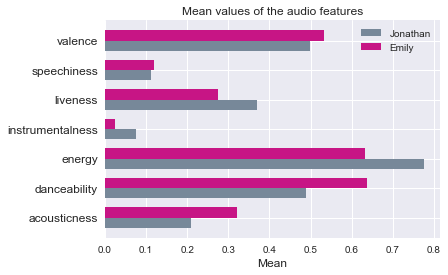

In [317]:
# Number of features
N = len(features_jhon.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, features_jhon.mean() , width, label='Jonathan', color = 'lightslategray')
#Bar plot with her list
plt.barh(ind + width, features_emy.mean(), width, label='Emily', color = 'mediumvioletred')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width / 2, (list(features_emy)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()




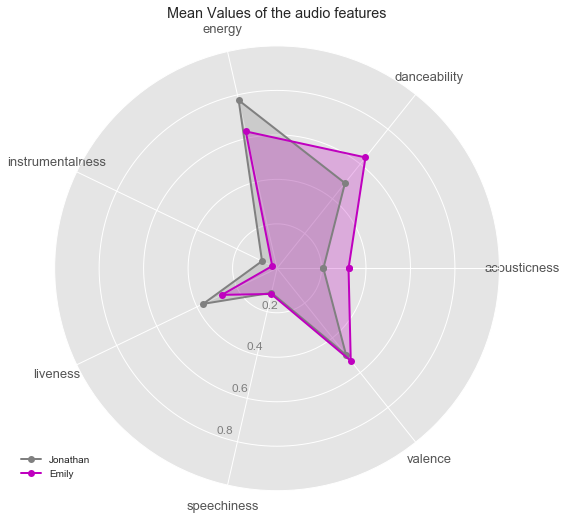

In [318]:

labels= list(features_jhon)[:]
stats= features_jhon.mean().tolist()
stats2 = features_emy.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats=np.concatenate((stats,[stats[0]]))
stats2 =np.concatenate((stats2,[stats2[0]])) 
angles=np.concatenate((angles,[angles[0]]))

#Size of the figure
fig=sns.plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Jonathan", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Emily", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))




The tempo is an important feature in terms of music analysis. It can be as significant as melody, harmony or rhythm due to the fact that it represents the speed of a song and the mood it evokes. For instance, the higher the BPM of a song, the faster the song is and consequently more inspiring and joyful it tends to be. On the other hand, a low BPM means that the song is slower, which can indicate sadness, romance or drama. 


Looking at the graph below we can see that our lists have tempo close to 120 BPM on average which indicates a moderate/fast tempo. Based on that I would say that both types of track could be of interest for those who enjoy fast walking and running since a song with 120 BPM can usually be synchronized with the one's stride pattern and their pace in order to make the run/walk harder and faster.

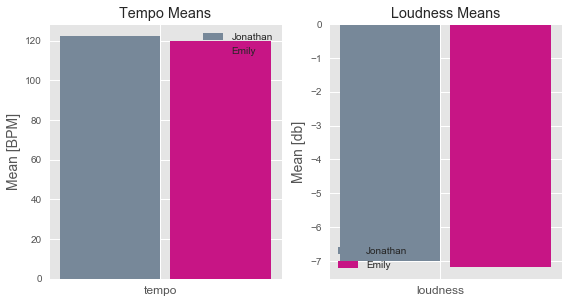

In [319]:
tempo_emy = df_couple.loc[ df_couple.who == 0, ['tempo']]
tempo_jhon = df_couple.loc[ df_couple.who == 1, ['tempo']]

N = len(tempo_emy.mean())

ind = np.arange(N) 

plt.subplot(221)
width = 0.35      
plt.bar(ind, tempo_jhon.mean() , width, label='Jonathan', color = 'lightslategray')
plt.bar(ind + 1.1*width, tempo_emy.mean(), width, label='Emily', color = 'mediumvioletred')

plt.ylabel('Mean [BPM]', fontsize = 14)
plt.title('Tempo Means')

plt.xticks(ind + width / 2, (list(tempo_emy)[:]), fontsize = 12)
plt.legend(loc='best')
style.use("ggplot")


plt.subplot(222)

loud_emy = df_couple.loc[ df_couple.who == 0, ['loudness']]
loud_jhon = df_couple.loc[ df_couple.who == 1, ['loudness']]

N = len(loud_emy.mean())

ind = np.arange(N) 

width = 0.35      
plt.bar(ind, loud_jhon.mean() , width, label='Jonathan', color = 'lightslategray')
plt.bar(ind + 1.1*width, loud_emy.mean(), width, label='Emily', color = 'mediumvioletred')

plt.ylabel('Mean [db]', fontsize = 14)
plt.title('Loudness Means')



plt.xticks(ind + width / 2, (list(loud_emy)[:]), fontsize = 12)
plt.legend(loc='lower left')
style.use("ggplot")
plt.rcParams['figure.figsize'] =(12,13)
plt.tight_layout()
plt.show()


In [320]:
tempo_emy.mean()

tempo    119.632323
dtype: float64

In [321]:
tempo_jhon.mean()

tempo    122.29203
dtype: float64

For the purpose of comparing the audio features, it is important to look at the bar chart below. It shows the difference between the mean of each attribute of** mine and Emily's song lists. **

**In line with that**, we can see clearly that my list is more **energetic, livier and instrumental** than hers. Besides, we can also notice a slight difference in our **speechiness** variables and see that **valence, danceability** and **accousticness** take the top spot on her side.






 

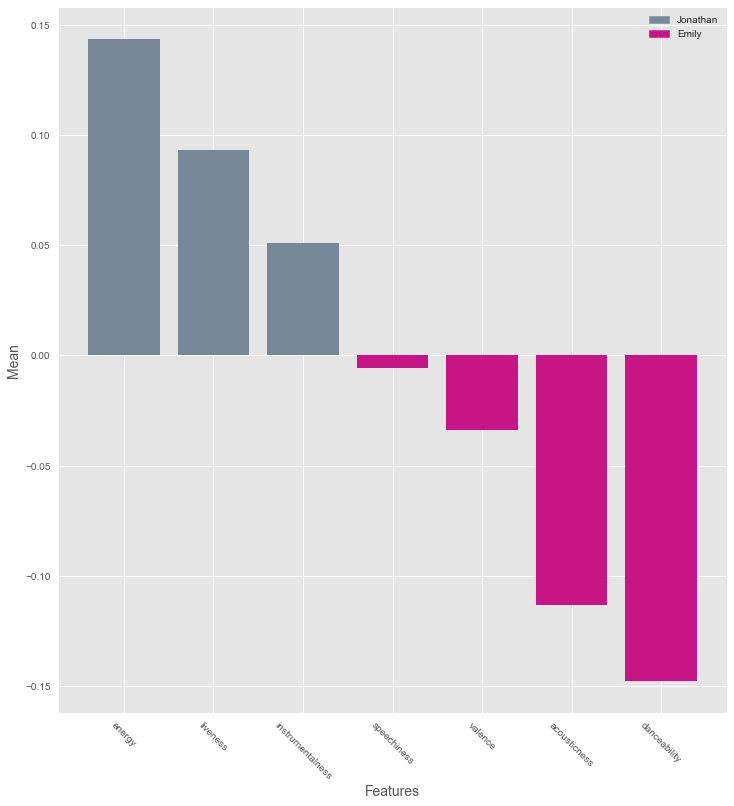

In [322]:
colors = ['lightslategray','lightslategray','lightslategray',
          'mediumvioletred','mediumvioletred','mediumvioletred','mediumvioletred']
dif_features = features_jhon.mean() - features_emy.mean()

index = dif_features.sort_values(ascending = False).index

#Plot
fig, ax = plt.subplots()
x = np.arange(dif_features.count())
y = dif_features.sort_values(ascending = False)
plt.bar(x,y, color = colors)
plt.xticks(x, (features_jhon.columns))
ax.set_xticklabels(index, rotation=-45)



#Create Legend
import matplotlib.patches as mpatches
gray_patch = mpatches.Patch(color ='lightslategray', label = 'Jonathan')
violet_patch = mpatches.Patch(color = 'mediumvioletred', label = 'Emily')
plt.legend(handles = [gray_patch,violet_patch], loc = 'upper right')

#labels
plt.ylabel('Mean', fontsize = 14)
plt.xlabel('Features', fontsize = 14)
plt.show()


## How diversified are the lists ?!

The variety of the lists can be investigated by checking the difference in genres of our songs. In case most of the songs belong to the same genre we would say that they are low varied.

The question is: How would we analyze this ? well, the answer is simple : Let's check the standard deviation of each audio variable and examine them. 

Although the standard deviation of the audio features themselves do not give us much information ( as we can see in the plots below), we can sum them up and calculate the mean of the standard deviation of the lists. By doing that we get the values represented in the plot "Variety of Audio Features" with values of **0.22 in **my list and **0.20 in** Emily's list.

How would we interpret that?! Well, let's say we can have songs with a high value of a specific feature such as energy and other songs with a really low value for the same attribute. In short, those numbers suggest that my songs are a bit more diversified than Emily's.

In [323]:
round(features_jhon.std().mean(),2)

0.22

In [324]:
round(features_emy.std().mean(),2)

0.2

In [325]:
features_jhon.std().mean()

0.22191480992097065

In [326]:
features_emy.std().mean()

0.19850736896114182

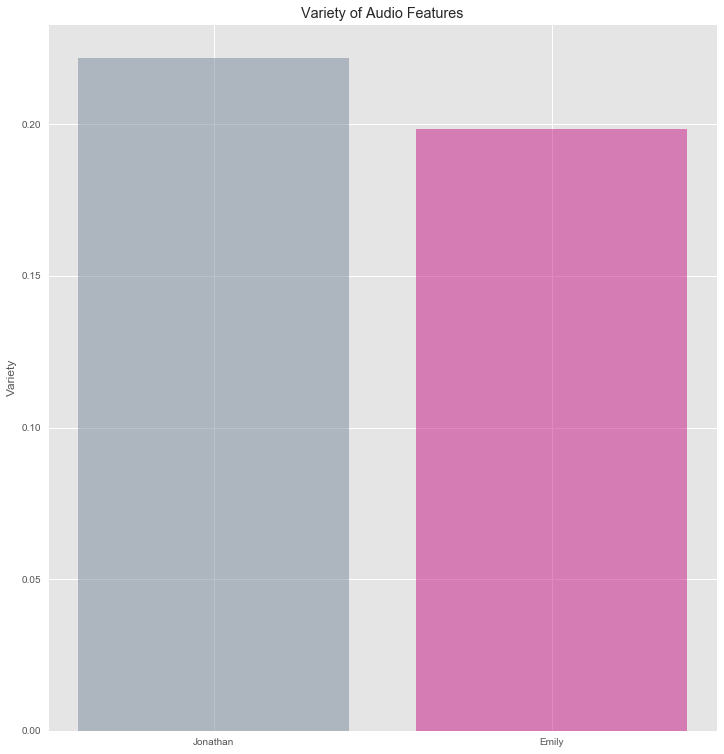

In [327]:
data = [features_jhon.std().mean(), features_emy.std().mean()]
names = ('Jonathan','Emily')
pos = np.arange(len(names))
colors = ['lightslategray', 'mediumvioletred']

plt.bar(pos, data, align = 'center', alpha = 0.5, color = colors)
plt.xticks(pos, names)
plt.ylabel('Variety')
plt.title('Variety of Audio Features')
plt.show()


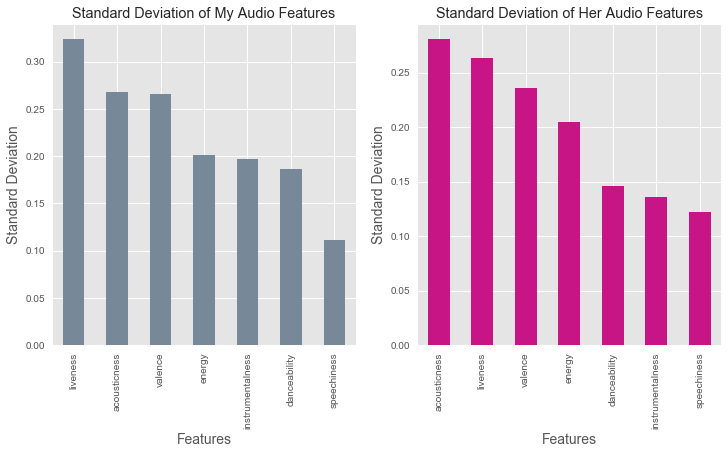

In [328]:
plt.subplot(221)

features_jhon.std().sort_values(ascending= False).plot(kind = 'bar', color = 'lightslategray')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of My Audio Features")

plt.subplot(222)
features_emy.std().sort_values(ascending= False).plot(kind = 'bar', color = 'mediumvioletred')

plt.xlabel('Features', fontsize = 14)
plt.ylabel('Standard Deviation', fontsize = 14)
plt.title("Standard Deviation of Her Audio Features")
plt.rcParams['figure.figsize'] =(15,15)


In [329]:
features_couple = features(df_couple, who = 'both')
features_couple.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,who
0,0.610,0.634,0.536,0.000071,0.3930,0.0268,0.684,1
1,0.125,0.643,0.581,0.000434,0.0852,0.0325,0.824,1
2,0.428,0.427,0.422,0.000024,0.0874,0.0411,0.442,1
3,0.403,0.536,0.717,0.000000,0.1200,0.0374,0.878,1
4,0.148,0.755,0.577,0.000573,0.2150,0.0384,0.944,1


## Correlation Between Variables

we can also build correlation plots , such as scatter plots, to show the relationship between variables. In our case, we will correlate the feature valence which describes the musical positiveness with danceability and energy. 

In order to interpret the plots below, we have to keep in mind that numbers one ( green dots) and zero (gray dots) represent mine and Emily's songs, respectively. That said, let's check the scatter plots.

### Valence and Energy


The correlation between valence and energy shows us that there is a conglomeration of songs with high energy and a low level of valence. This means that many of my energetic songs sound more negative with feelings of sadness, anger and depression ( NF takes special place here haha). whereas when we look at the grays dots we can see that as the level of valence - positive feelings increase, the energy of the songs also increases. Although her data is split , we can identify this pattern which indicates a kind of 'linear' correlation between the variables.

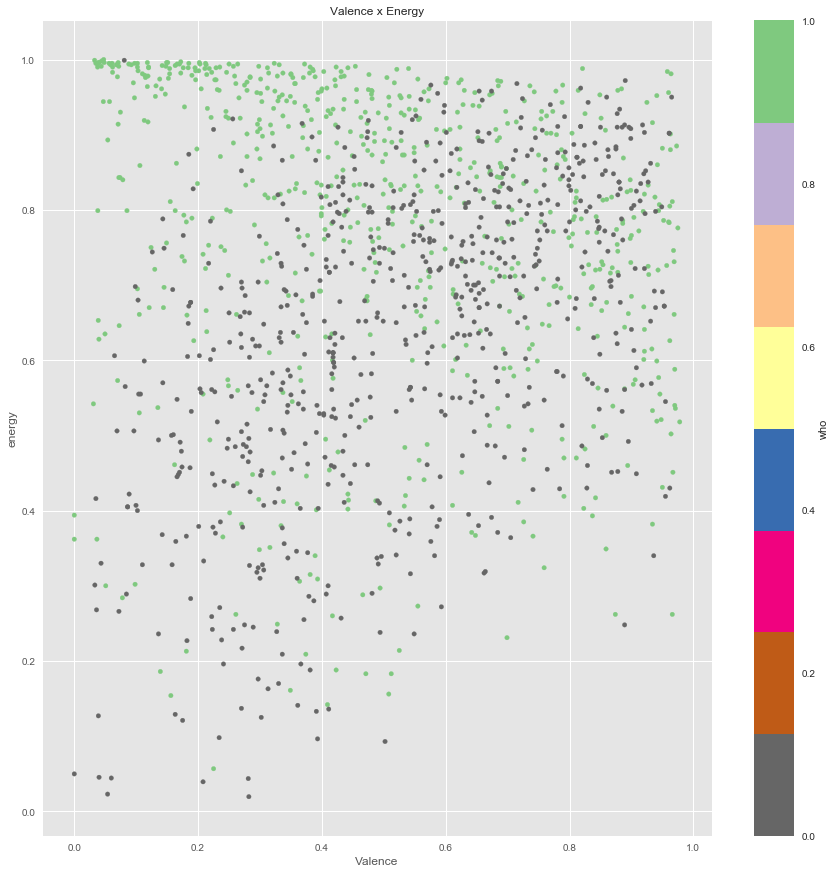

In [330]:
fig, ax = plt.subplots()
style.use('seaborn')
df_couple.plot(kind='scatter',x='valence', y='energy',ax = ax ,c='who', colormap = 'Accent_r' ,title="Valence x Energy")
ax.set_xlabel("Valence")
plt.show()

# Valence and Danceability

Now, looking at the relationship between valence and danceability we can see that Emily's songs have high values of danceability split in the first and second quadrant of the plot. On the other hand, my songs are mostly either in the third or in the first quadrant, showing a kind of variety in terms of these two features.

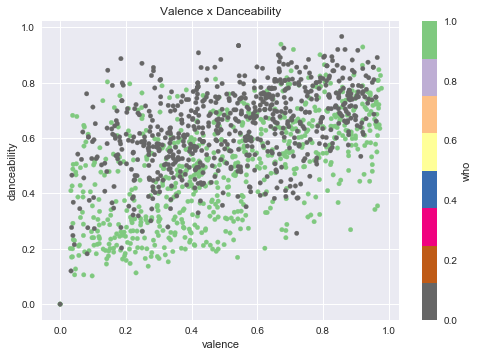

In [331]:
fig,ax = plt.subplots()
df_couple.plot(kind = 'scatter', x = 'valence', y = 'danceability', c = 'who',ax = ax, colormap = 'Accent_r', title = 'Valence x Danceability')
plt.show()

## The Machine Learning Approach

Ok, we've got some insights from the data. In order to keep this article short, let's jump right into the best part (at least to me) which is the machine learning (ML) algorithm.

It's important to bear in mind that I'm not 100% focused on the accuracy of the model. Besides, we will be using a Support Vector Machine (svm)  due to the fact that it is the one I'm currently studying. In addition, I won't explain how svm works. Instead, let's say that it is a supervised ML approach which is used for both classification and regression problems. Also, it's main task (classification) is to separate all the classes by defining an optimal hyperplane that discriminates them. That being said, let's build an algorithm to predict if a song is more likely to belong to my list or Emily's.







### Removing Features

The first step is to preprocess our data set in order to have a dataframe with numerical values in all of the columns. So let's start off dropping all features which are not relevant to our model such as id, album, name, uri, popularity and track_number and separate the target (who column) from our dataframe. We can easily do that by building the function features_removal which receives a list with the features we want to drop as a parameter.

Notice that after its removal, we still have a categorical feature (**artist**). So, we'll have to deal with that in the second step. Also, important to mention that we have two slightly balanced classes (column who) which indicate whose list the song belongs to. In short, there are 703 songs in my list and 691 in her list and, that balance, in terms of quantity is important to our model.



In [332]:
df_couple.head(3)

,acousticness,album,danceability,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,track_number,uri,valence,artist,who
0,0.610,Free Soul. the treasure of Al Green Remaster,0.634,0.536,41CbErP6D25qGVIux11KxI,0.000071,0.3930,-8.222,Call Me (Come Back Home),1,0.0268,99.533,2,spotify:track:41CbErP6D25qGVIux11KxI,0.684,Al Green,1
1,0.125,Free Soul. the treasure of Al Green Remaster,0.643,0.581,06BA6xre08wcIwVW5HUNEh,0.000434,0.0852,-6.975,I'm Still In Love With You,1,0.0325,97.630,3,spotify:track:06BA6xre08wcIwVW5HUNEh,0.824,Al Green,1
2,0.428,Free Soul. the treasure of Al Green Remaster,0.427,0.422,21GJBVgndtsseyPRLA7l1Z,0.000024,0.0874,-8.685,How Can You Mend A Broken Heart?,1,0.0411,146.917,4,spotify:track:21GJBVgndtsseyPRLA7l1Z,0.442,Al Green,1


In [333]:
# Remove columns
def features_removal(features_list):
    for i in features_list:
        df_couple.drop(i, axis = 1, inplace = True)
    return ';)'

In [334]:
# Apply function
features_removal(['id', 'album', 'name', 'popularity', 'track_number', 'uri'])
df_couple.head(3)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist,who
0,0.610,0.634,0.536,0.000071,0.3930,-8.222,0.0268,99.533,0.684,Al Green,1
1,0.125,0.643,0.581,0.000434,0.0852,-6.975,0.0325,97.630,0.824,Al Green,1
2,0.428,0.427,0.422,0.000024,0.0874,-8.685,0.0411,146.917,0.442,Al Green,1


In [335]:
df_couple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 11 columns):
acousticness        1394 non-null float64
danceability        1394 non-null float64
energy              1394 non-null float64
instrumentalness    1394 non-null float64
liveness            1394 non-null float64
loudness            1394 non-null float64
speechiness         1394 non-null float64
tempo               1394 non-null float64
valence             1394 non-null float64
artist              1394 non-null object
who                 1394 non-null int64
dtypes: float64(9), int64(1), object(1)
memory usage: 119.9+ KB


In [336]:
#Remove who column from our data set
target = df_couple['who']
df_couple.drop('who', axis = 1, inplace = True)

In [337]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: who, dtype: int64

In [338]:
# Notice that we have a slightly balanced data
target.value_counts()

1    703
0    691
Name: who, dtype: int64

In [339]:
df_couple.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,artist
0,0.610,0.634,0.536,0.000071,0.3930,-8.222,0.0268,99.533,0.684,Al Green
1,0.125,0.643,0.581,0.000434,0.0852,-6.975,0.0325,97.630,0.824,Al Green
2,0.428,0.427,0.422,0.000024,0.0874,-8.685,0.0411,146.917,0.442,Al Green
3,0.403,0.536,0.717,0.000000,0.1200,-7.202,0.0374,95.803,0.878,Al Green
4,0.148,0.755,0.577,0.000573,0.2150,-6.954,0.0384,119.651,0.944,Al Green


### Label Encoder

The second task is to transform all categocal data (artists names) into numeric data. Why do we have to do that? Well, the ML algorithm only accepts numerical data, hence, the reason why we have to use the class LabelEncoder to encode each artist name into a specific number. The encoding process is shown below.


In [340]:
# Import LabelEncode
from sklearn.preprocessing import LabelEncoder

In [341]:
# LabelEncoder obj 
enc = LabelEncoder()

In [342]:
# Set Labels
artist_label = enc.fit_transform(df_couple.artist)

In [343]:
#Create column containin the labels
df_couple['labels_artists'] = artist_label

In [344]:
#Remove colum artist (cathegorical data)
features_removal(['artist'])

';)'

In [345]:
# DataFrame
df_couple.sample(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,labels_artists
691,0.028200,0.746,0.880,0.000000,0.3400,-3.466,0.2680,91.688,0.7870,0
645,0.010600,0.591,0.721,0.000000,0.0622,-5.022,0.3170,152.527,0.6820,0
158,0.004040,0.183,0.881,0.000745,0.0925,-6.520,0.0640,76.914,0.1980,9
932,0.050800,0.535,0.737,0.000439,0.3190,-6.533,0.2510,170.031,0.7100,3
570,0.003670,0.575,0.988,0.000000,0.3250,-0.996,0.0905,137.122,0.8210,20
264,0.000001,0.387,0.893,0.214000,0.0696,-5.196,0.0913,131.983,0.0541,19
709,0.084300,0.503,0.744,0.000000,0.7230,-5.070,0.0374,110.027,0.1260,12
1118,0.955000,0.388,0.242,0.000047,0.0999,-12.177,0.0481,137.411,0.2230,4
671,0.446000,0.623,0.873,0.000000,0.9350,-7.175,0.4210,93.813,0.7500,0
238,0.006960,0.200,0.990,0.946000,0.1360,-4.352,0.1590,133.734,0.0376,19


In [346]:
df_couple.labels_artists.value_counts()

3     119
19    102
4     102
8      88
10     83
16     83
9      83
2      78
20     74
6      73
0      66
13     63
12     58
11     57
15     57
1      56
14     42
17     39
5      36
18     27
7       8
Name: labels_artists, dtype: int64

## Pipeline

Now that we have our data set almost ready we can build our model. You might be wondering : almost ready ?! Well, when we are dealing with some ML algorithms we have to keep in mind that some of them expect data in a specific range or structure. For instance, sometimes we have to transform our data into a higher dimension in order to find the boundary that separates the classes as can be seen in the figure below. To accomplish that, we use a technique called kernel trick which offers an efficient and less expensive way to do this mapping. In addition, it uses different functions ( kernel) for that and the most popular ones are polynomial, linear and radial basis function (RBF). The last one, for example, requires features centered around 0 and with variances in the same order and that is the reason why we have to preprocess our data.


<img src="kernel.png" width="700" height="700" align="center"/>

In [347]:
# radial basis function (RBF)

<img src="RBF.png" width="500" height="500" align="center"/>


In [348]:
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [349]:
# Cross-validation and accuracy of the model

def accuracy(clf, data, target):
    results = cross_val_predict(clf, data ,target ,cv = 10)
    return metrics.accuracy_score(target,results)    

In [350]:
# Pipelines 
pip_1 = Pipeline([('scaler',StandardScaler()),
                  ('clf', svm.SVC())
])

pip_2 = Pipeline([('scaler',StandardScaler()),
                  ('clf', svm.SVC(kernel = 'linear'))               
])

pip_3 = Pipeline([('scaler', StandardScaler()),
                  ('clf', svm.SVC(kernel = 'poly'))                
 ])

pip_4 = Pipeline([('min_max_scaler', MinMaxScaler()),
                  ('clf', svm.SVC())               
])

pip_5 = Pipeline([('min_max_scaler', MinMaxScaler()),
                  ('clf', svm.SVC(kernel= 'linear'))               
])

pip_6 = Pipeline([('min_max_scaler', MinMaxScaler()),
                  ('clf', svm.SVC(kernel='poly'))               
])

pip_7 = Pipeline([('Normalize', Normalizer()),
                  ('clf', svm.SVC() )    
])

pip_8 = Pipeline([('Normalize', Normalizer()),
                  ('clf', svm.SVC(kernel='linear') )    
])

pip_9 = Pipeline([('Normalize', Normalizer()),
                  ('clf', svm.SVC(kernel='poly') )    
])



In [351]:
# list with pipelines
pip_list= []
pip_list.append(('Scaler_rbf', pip_1))
pip_list.append(('Scaler_linear', pip_2))
pip_list.append(('Scaler_poly', pip_3))

pip_list.append(('Min_max_scaler', pip_4))
pip_list.append(('Min_max_scaler_linear', pip_5))
pip_list.append(('Min_max_scaler_poly', pip_6))

pip_list.append(('Normalizer', pip_7))
pip_list.append(('Normalizer_linear', pip_8))
pip_list.append(('Normalizer_poly', pip_9))




In [352]:
# Function to build models
def model_accuracy(clf_models, data, target):
    
    results = []
    names = []
    
    for name, pip in clf_models:
        cross_val = cross_val_predict(pip, data, target, cv = 10)
        accuracy = metrics.accuracy_score(target, cross_val)               
        print(f'name: {name} - Accuracy : {accuracy:.4f}')



In [353]:
# Models
model_accuracy(pip_list, df_couple,target)

name: Scaler_rbf - Accuracy : 0.7059
name: Scaler_linear - Accuracy : 0.6155
name: Scaler_poly - Accuracy : 0.6851
name: Min_max_scaler - Accuracy : 0.6255
name: Min_max_scaler_linear - Accuracy : 0.6047
name: Min_max_scaler_poly - Accuracy : 0.6162
name: Normalizer - Accuracy : 0.5036
name: Normalizer_linear - Accuracy : 0.4476
name: Normalizer_poly - Accuracy : 0.5043


## Tunning


The model with RBF kernel and StandardScaler preprocessing gave us the highest accuracy but we can improve it by tunning  it's hyper-parameters. Let's use GridSearchCV to exhaustively combine different values for C and Gamma and test them in our algorithm.

In [354]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [355]:
# Values for parameter C

C_list = [0.001 , 0.01, 0.1 , 1 , 10 , 100]

#Values for parameter Gamma
Gamma_list = [0.001, 0.01 , 0.1, 1, 10, 100]




In [356]:
# Dictionary with lists of parameters
Grid_parameters = dict(clf__C = C_list, clf__gamma = Gamma_list)
Grid_parameters

{'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [357]:
# Grid object with pip_1, Grid_parameters, numbers of folders (cv) and accuracy (scoring) as parameters 
grid = GridSearchCV(pip_1,Grid_parameters,cv = 10, scoring = 'accuracy')

In [358]:
#Apply gridsearch to our data and target 
grid.fit(df_couple,target)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 'clf__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [359]:
grid.grid_scores_

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.50430, std: 0.00142, params: {'clf__C': 0.001, 'clf__gamma': 0.001},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.001, 'clf__gamma': 0.01},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.001, 'clf__gamma': 0.1},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.001, 'clf__gamma': 1},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.001, 'clf__gamma': 10},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.001, 'clf__gamma': 100},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.01, 'clf__gamma': 0.001},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.01, 'clf__gamma': 0.01},
 mean: 0.61334, std: 0.11516, params: {'clf__C': 0.01, 'clf__gamma': 0.1},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.01, 'clf__gamma': 1},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.01, 'clf__gamma': 10},
 mean: 0.50430, std: 0.00142, params: {'clf__C': 0.01, 'clf__gamma': 100},
 mean: 0.48924, std: 0.04736, params: {'clf__C': 0.1, 'clf__gamma': 0.001},
 mean: 0.63343, st

In [360]:
grid.best_params_

{'clf__C': 10, 'clf__gamma': 0.1}

In [361]:
grid.best_score_

0.76685796269727402

# Conclusion

In this Jupyter notebook I used the Spotify API to analyze the audio features of my Fiancée and my music list. Instead of checking our playlist, I used features of the 10th artists we listen the most in our daily routine. Based on that I concluded that my list is more varied than hers and surprisingly my songs are more energetics. Another insight (I expected that :] ) is the fact that Emily's songs are more danceable. To complement the analysis I also built a machine learning model (svm) to predict if a song is more likely to be listened to by her or me. The accuracy of the model was about 74% which is good(it can be improved though).

